## Final Project Submission

* Student name: Tori Magin  
* Student pace: part-time 
* Scheduled project review date/time: 23rd Oct, 11.59pm 
* Instructor name: Hardik
~*~*~*~*~*~*~*~*~*~*~*~* 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
#from sklearn import data sets, linear_model
import seaborn as sns

#model evaluation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('kc_house_data.csv')

## Data Preparation 

In [3]:
sum(df['waterfront'] == 1) / sum (df['waterfront'] == 0)

0.007653997378768021

In [4]:
df['waterfront'] = df['waterfront'].fillna(pd.Series(np.random.choice([1, 0], 
                                                      p=[0.007653997378768021, 0.992346002621232], size=len(df))))

In [5]:
df['view'].fillna(0, inplace=True)
df['yr_renovated'].fillna(0, inplace=True)

In [6]:
df.drop(columns=['id','date', 'long', 'lat', 'zipcode', 'sqft_basement'], axis=1, inplace=True)

In [7]:
df['period_built'] = df['yr_built']

In [8]:
df.loc[df['period_built'] < 1930, 'period_built'] = 1
df.loc[(df['period_built'] < 1960) & (df['period_built'] > 1929), 'period_built'] = 2
df.loc[(df['period_built'] < 1990) & (df['period_built'] > 1959), 'period_built'] = 3
df.loc[(df['period_built'] < 2020)  & (df['period_built'] > 1989), 'period_built'] = 4


In [9]:
df.loc[df['period_built'] == 1, 'period_built'] = '1900_29'
df.loc[(df['period_built'] == 2), 'period_built'] = '1930_59'
df.loc[(df['period_built'] == 3), 'period_built'] = '1960_89'
df.loc[(df['period_built'] == 4), 'period_built'] = '1990_2020'

In [10]:
df = df.drop(columns=['yr_built'], axis=1, inplace=False)

In [11]:
df['renovated'] = df['yr_renovated']

In [12]:
df.loc[df['renovated'] == 0 , 'renovated'] = 0
df.loc[df['renovated'] > 0 , 'renovated'] = 1

In [13]:
df.loc[df['renovated'] == 0 , 'renovated'] = 'No'
df.loc[df['renovated'] == 1 , 'renovated'] = 'Yes'
df.drop('yr_renovated', axis=1, inplace=True)

In [14]:
df['grades'] = df['grade']

In [15]:
df.loc[(df['grades'] >0) & (df['grades'] <5), 'grades'] = 1
df.loc[(df['grades'] >4) & (df['grades'] <7), 'grades'] = 2
df.loc[(df['grades'] >6) & (df['grades'] <9), 'grades'] = 3
df.loc[(df['grades'] >8) & (df['grades'] <11), 'grades'] = 4
df.loc[(df['grades'] >10) & (df['grades'] <13), 'grades'] = 5
df.loc[ (df['grades'] >12), 'grades'] = 6

In [16]:
df.loc[df['grades'] == 1, 'grades'] = 'VeryPoor'
df.loc[df['grades'] == 2, 'grades'] = 'Poor'
df.loc[df['grades'] == 3, 'grades'] = 'Average'
df.loc[df['grades'] == 4, 'grades'] = 'Good'
df.loc[df['grades'] == 5, 'grades'] = 'VeryGood'
df.loc[df['grades'] == 6, 'grades'] = 'Excellent'

In [17]:
df.drop(columns=['grade'], axis=1, inplace=True)

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='price'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_lot', ylabel='price'>,
        <AxesSubplot:xlabel='floors', ylabel='price'>,
        <AxesSubplot:xlabel='waterfront', ylabel='price'>,
        <AxesSubplot:xlabel='view', ylabel='price'>,
        <AxesSubplot:xlabel='condition', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_above', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_living15', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_lot15', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='sqft_lot', ylabel='bedrooms'>,
       

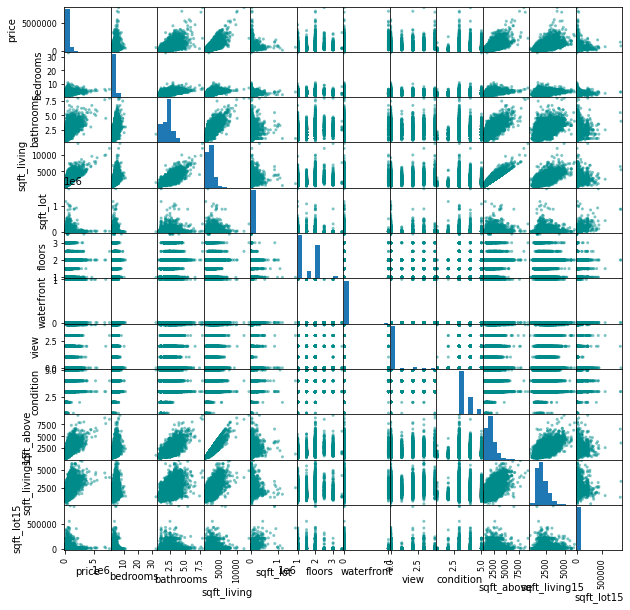

In [18]:
pd.plotting.scatter_matrix(df, figsize=(10,10), color="darkcyan")

Based on the above scatter plots, there appears to be very low correlation between *floors*, *view*,*sqft_lot15*, and *sqft_lot* and the price. Therefore, these features will be dropped from the data set.  


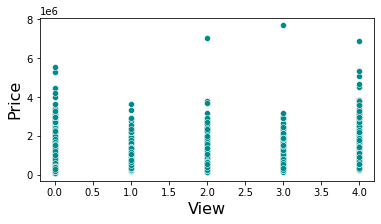

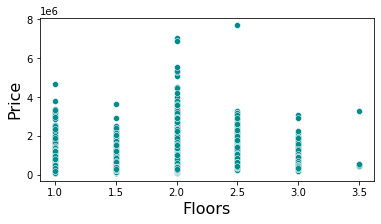

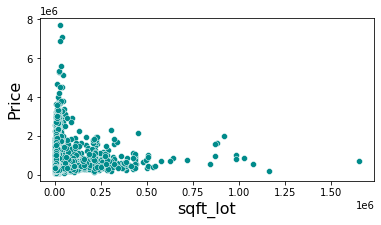

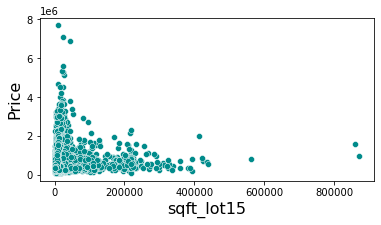

In [19]:
plt.figure( figsize=(6,3))
sns.scatterplot(data=df,x='view',y='price', color='darkcyan')
plt.xlabel('View', fontsize=(16)) #x label
plt.ylabel('Price',  fontsize=(16)) #y label
plt.savefig('price_view.png')
plt.show()

plt.figure(figsize=(6,3))
sns.scatterplot(data=df,x='floors',y='price', color='darkcyan')
plt.xlabel('Floors', fontsize=(16)) #x label
plt.ylabel('Price',  fontsize=(16)) #y label
plt.savefig('price_floors.png')
plt.show()

plt.figure(figsize=(6,3))
sns.scatterplot(data=df,x='sqft_lot',y='price', color='darkcyan')
plt.xlabel('sqft_lot', fontsize=(16)) #x label
plt.ylabel('Price',  fontsize=(16)) #y label
plt.savefig('price_sqft_lot.png')
plt.show()

plt.figure(figsize=(6,3))
sns.scatterplot(data=df,x='sqft_lot15',y='price', color='darkcyan')
plt.xlabel('sqft_lot15', fontsize=(16)) #x label
plt.ylabel('Price',  fontsize=(16)) #y label
plt.savefig('price_sqft_lot15.jpeg')
plt.show()


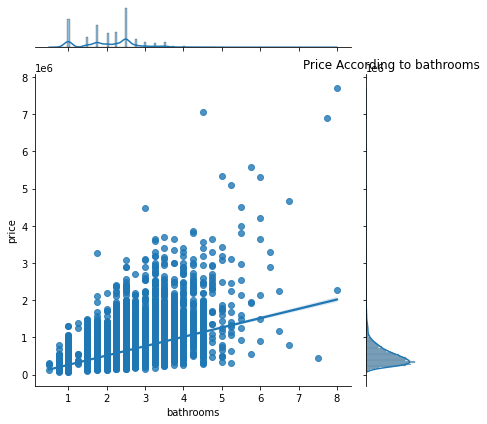

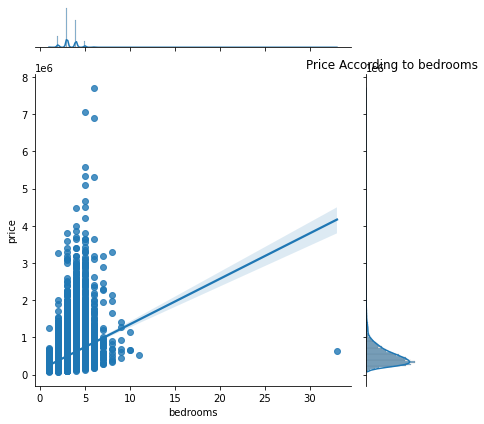

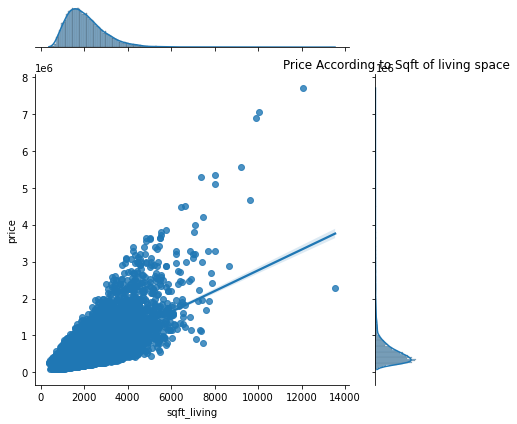

In [20]:
sns.jointplot('bathrooms','price', data=df, kind='reg')
plt.title("Price According to bathrooms")
plt.tight_layout()

sns.jointplot('bedrooms','price', data=df, kind='reg')
plt.title("Price According to bedrooms")
plt.tight_layout()

sns.jointplot('sqft_living','price', data=df, kind='reg')
plt.title("Price According to Sqft of living space")
plt.tight_layout()

Bedrooms appears to have a very weak linear relationship with price and potentionally violates the linearity assumption. We will include bedrooms in the baseline model as it seems logical that bedrooms would be a strong predictor of price and examine it closer in later models. 

In [21]:
df.drop(columns=['view', 'floors','sqft_lot','sqft_lot15'], axis=1, inplace=True)

### Deaing with Catagorical Variables

First, we looked at the categorical variable's mean price by category to check if there was a variation between the different categories. If there is no variation, the variable may be dropped from the analysis. 

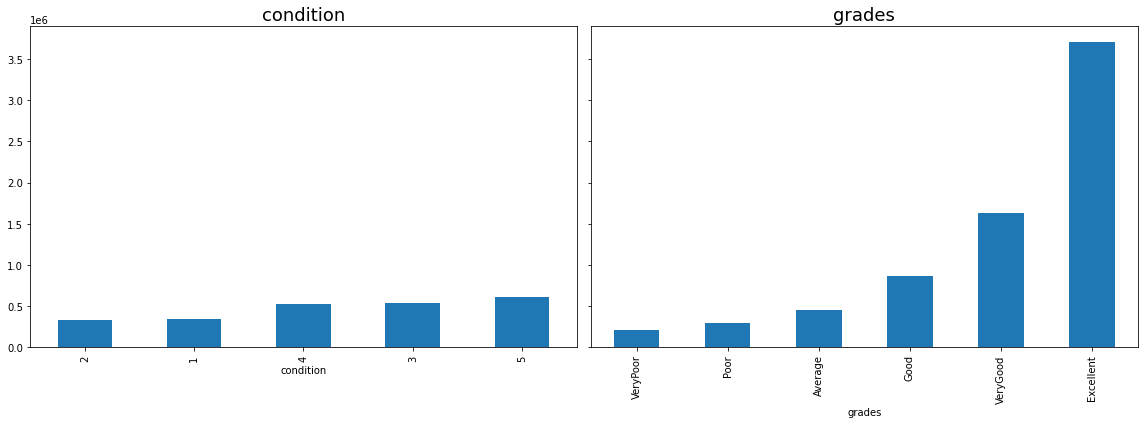

In [22]:
categoricals =  ['condition', 'grades']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharey=True)
for col, ax in zip(categoricals, axes.flatten()):
    (df.groupby(col)              
         .mean()['price']        
         .sort_values()             
         .plot
         .bar(ax=ax))                
    ax.set_title(col, fontsize=18)                
fig.tight_layout()

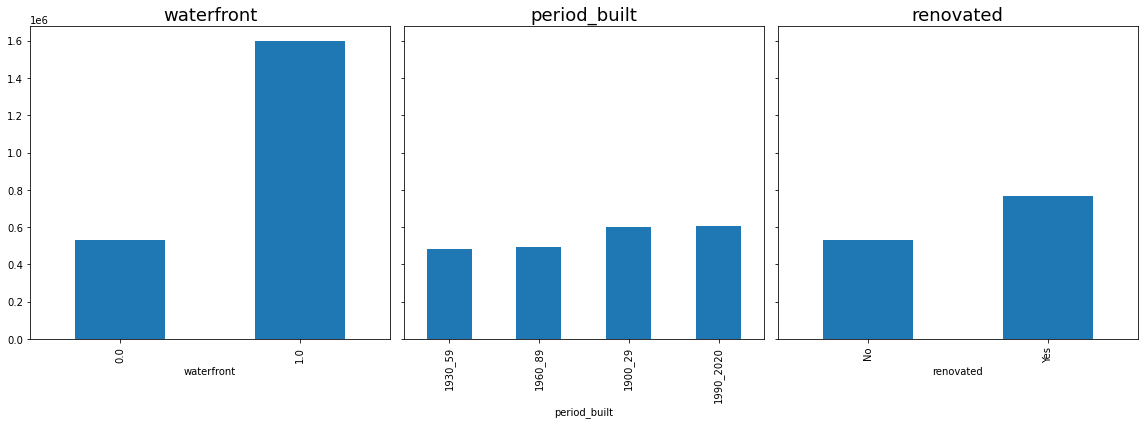

In [23]:
categoricals =  ['waterfront','period_built', 'renovated']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6), sharey=True)
for col, ax in zip(categoricals, axes.flatten()):
    (df.groupby(col)              
         .mean()['price']        
         .sort_values()             
         .plot
         .bar(ax=ax))                
    ax.set_title(col, fontsize=18)                
fig.tight_layout()

#### Creating Dummy Variables

In [24]:
condition_dummies = pd.get_dummies(df['condition'], prefix='condition', drop_first=True)
grades_dummies = pd.get_dummies(df['grades'], prefix='grade', drop_first=True)
pb_dummies = pd.get_dummies(df['period_built'], prefix='period_built', drop_first=True)
reno_dummies = pd.get_dummies(df['renovated'], prefix='renovated', drop_first=True)
wf_dummies = pd.get_dummies(df['waterfront'], prefix='waterfront', drop_first=True)

df_dummies = df.drop(['condition', 'grades','period_built', 'renovated', 'waterfront'], axis=1)
df_dummies = pd.concat([df_dummies,condition_dummies, grades_dummies, pb_dummies, reno_dummies, wf_dummies], axis=1)
df_dummies.head()

,price,bedrooms,bathrooms,sqft_living,sqft_above,sqft_living15,condition_2,condition_3,condition_4,condition_5,grade_Excellent,grade_Good,grade_Poor,grade_VeryGood,grade_VeryPoor,period_built_1930_59,period_built_1960_89,period_built_1990_2020,renovated_Yes,waterfront_1.0
0,221900.0,3,1.00,1180,1180,1340,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,538000.0,3,2.25,2570,2170,1690,0,1,0,0,0,0,0,0,0,1,0,0,1,0
2,180000.0,2,1.00,770,770,2720,0,1,0,0,0,0,1,0,0,1,0,0,0,0
3,604000.0,4,3.00,1960,1050,1360,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,510000.0,3,2.00,1680,1680,1800,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [25]:
df_dummies = df_dummies.rename(columns={'waterfront_1.0': 'waterfront_1'})

In [26]:
def best_line(X, Y):
    """This function plots the best-fit line for a group of datapoints broken into
    a set of independent variable values (X) and a set of dependent variable values (Y)"""
    import numpy as np
    from matplotlib import pyplot as plt
    
    X_bar = np.mean(X)
    Y_bar = np.mean(Y)
    
    X_diffs = np.asarray([i - X_bar for i in X])
    Y_diffs = np.asarray([i - Y_bar for i in Y])
    
    num = X_diffs.dot(Y_diffs)
    denom = np.sqrt((X_diffs ** 2).sum() * (Y_diffs ** 2).sum())
    
    r_pearson = num / denom
    
    beta_1 = r_pearson * Y_diffs.std() / X_diffs.std()
    beta_0 = Y_bar - beta_1 * X_bar
    
    Xs = np.linspace(np.min(X), np.max(X), 100)
    Ys = beta_1 * Xs + beta_0
    
    fig, ax = plt.subplots()
    ax.plt(X, Y, 'ro', label='datapoints')
    ax.plt(Xs, Ys, 'k', label=f'y={round(beta_1, 2)}x+{round(beta_0, 2)}')
    plt.legend()
    plt.show();

### Baseline Model 

In [27]:
outcome = 'price'
x_cols = [ 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_above',
       'sqft_living15', 'condition_2', 'condition_3', 'condition_4',
       'condition_5', 'grade_Excellent', 'grade_Good', 'grade_Poor',
       'grade_VeryGood', 'grade_VeryPoor', 'period_built_1930_59',
       'period_built_1960_89', 'period_built_1990_2020', 'renovated_Yes',
       'waterfront_1']

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
baseline_model = ols(formula=formula, data=df_dummies).fit()
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     2136.
Date:                Sun, 23 Oct 2022   Prob (F-statistic):               0.00
Time:                        12:48:57   Log-Likelihood:            -2.9597e+05
No. Observations:               21597   AIC:                         5.920e+05
Df Residuals:                   21577   BIC:                         5.921e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.562e+05   4.12e+04      3.796      0.000    7.56e+04    2.37e+05
bedrooms               -3.315e+04   2058.273    -16.104      0.000   -3.72e+04   -2.91e+04
bathrooms               6.689e+04   3426.506     19.522      0.000    6.02e+04    7.36e+04
sqft_living              169.9468      4.466     38.050      0.000     161.192     178.701
sqft_above               -25.7811      4.198     -6.141      0.000     -34.010     -17.553
sqft_living15             54.3492      3.517     15.454      0.000      47.456      61.243
condition_2              1.44e+04   4.36e+04      0.331      0.741    -7.1e+04    9.98e+04
condition_3             5.457e+04   4.05e+04      1.349      0.177   -2.47e+04    1.34e+05
condition_4             7.806e+04   4.05e+04      1.928      0.054   -1284.488    1.57e+05
condition_5             1.169e+05   4.07e+04      2.871      0.004    3.71e+04    1.97e+05
grade_Excellent         2.165e+06   6.18e+04     35.021      0.000    2.04e+06    2.29e+06
grade_Good              1.938e+05   5205.698     37.236      0.000    1.84e+05    2.04e+05
grade_Poor             -9.354e+04   5475.653    -17.083      0.000   -1.04e+05   -8.28e+04
grade_VeryGood          6.219e+05   1.24e+04     50.299      0.000    5.98e+05    6.46e+05
grade_VeryPoor          -1.24e+05   4.12e+04     -3.006      0.003   -2.05e+05   -4.31e+04
period_built_1930_59   -8.838e+04   5293.564    -16.696      0.000   -9.88e+04    -7.8e+04
period_built_1960_89   -2.143e+05   5266.759    -40.680      0.000   -2.25e+05   -2.04e+05
period_built_1990_2020 -2.518e+05   6283.048    -40.081      0.000   -2.64e+05    -2.4e+05
renovated_Yes           6.228e+04   8506.518      7.321      0.000    4.56e+04     7.9e+04
waterfront_1            6.639e+05   1.71e+04     38.812      0.000     6.3e+05    6.97e+05
==============================================================================
Omnibus:                    12370.206   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           389720.913
Skew:                           2.198   Prob(JB):                         0.00
Kurtosis:                      23.341   Cond. No.                     2.23e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
Xb = df_dummies.drop("price", axis=1)
yb = df_dummies["price"]
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, random_state=1)

linreg = LinearRegression()
linreg.fit(Xb_train, yb_train)
LinearRegression()

LinearRegression()

In [29]:
yb_hat_train = linreg.predict(Xb_train)
yb_hat_test = linreg.predict(Xb_test)

In [30]:
train_mseb = mean_squared_error(yb_train, yb_hat_train)
test_mseb = mean_squared_error(yb_test, yb_hat_test)
print('Train Mean Squared Error:', train_mseb)
print('Test Mean Squared Error: ', test_mseb)

Train Mean Squared Error: 47933545448.385345
Test Mean Squared Error:  43693292342.35959


In [31]:
diff = ((test_mseb-train_mseb)/test_mseb)
print(diff)

-0.09704585941478559


In [32]:
#sns.pairplot(df_dummies, x_vars=Xb, y_vars=yb, kind='reg')

The baselines model‘s  R-Squared is 0.652,  indicating our model accounts for 65% of the variance in house prices. 

**Condition_2's** p-value (0.761) is greater than 0.5 and it's range spans zero, so it will be removed from the next model. 

To improve our model, we will also check for multicollinearity and correlation with price. 

## Checking Correlations and Multicollinearity


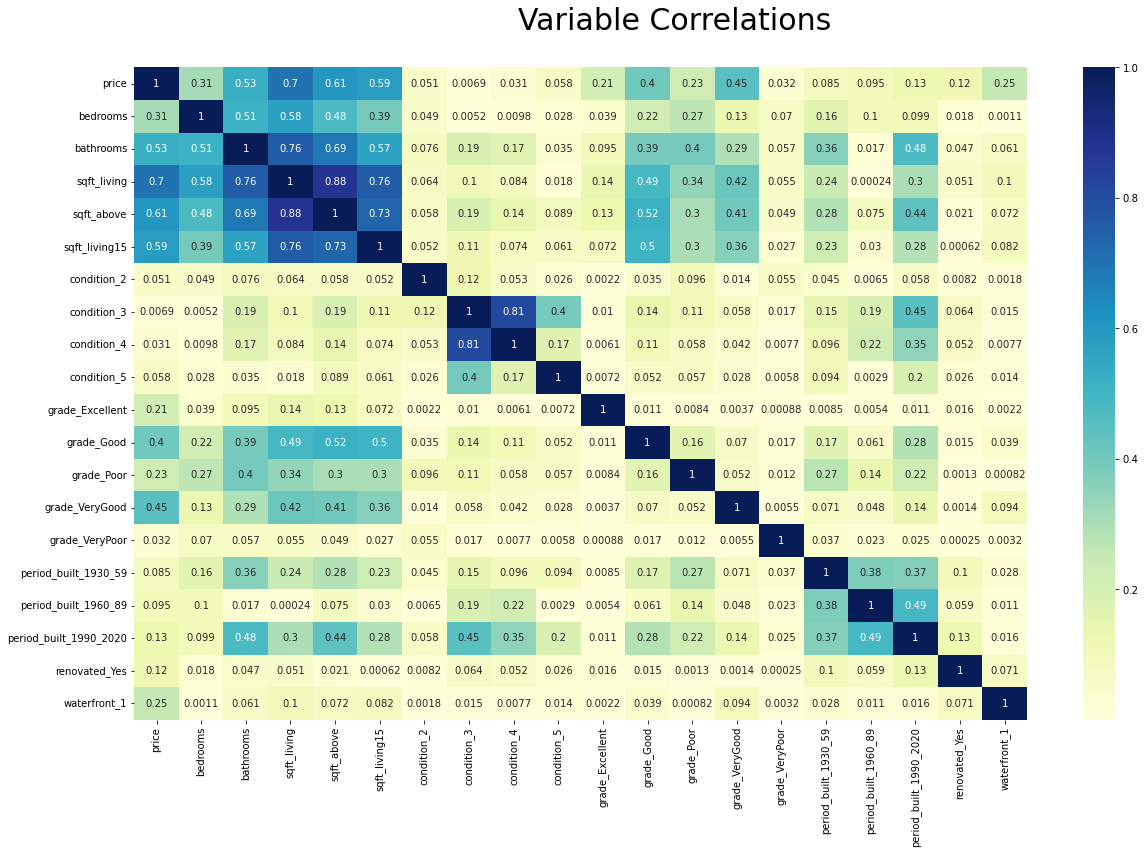

In [33]:
corr = df_dummies.corr().abs()
fig, ax=plt.subplots(figsize=(20,12))
fig.suptitle('Variable Correlations', fontsize=30, y=.95)
heatmap = sns.heatmap(corr, cmap='YlGnBu', annot=True)



The quick look at the heatmap shows price appears to be most correlated with the size of the house (living space), the size of neighbouring housing and the number of bathrooms. Condition and Period Built appear very weakly correlated with price.  

In [34]:
from patsy import dmatrices 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### To measure multicollinearity among the independent variables, highly correlated (> 0.75) pairs were produced. 

In [35]:
corr_ = df_dummies.corr().abs().stack().reset_index().sort_values(0, ascending=False)
corr_['pairs'] = list(zip(corr_.level_0, corr_.level_1))

corr_.set_index(['pairs'], inplace = True)
corr_.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
corr_.columns = ['cc']
corr_.drop_duplicates(inplace=True)

corr_[(corr_.cc>.75) & (corr_.cc<1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.876448
"(condition_3, condition_4)",0.812294
"(sqft_living, sqft_living15)",0.756402
"(bathrooms, sqft_living)",0.755758


We have 4 pairs and 6 variables with a correlation coeffiecent >0.75.   sqft_living occurs in 3/4 pairs so is a candidate for removal. 

For further clarity before deciding which variables are to be removed, the Variance Influence Factor (VIF)  between sqft_living and the other continuous independent variables will be calculated. 

A VIF of 1 would indicate complete independence from any other variable. This is one of the assumptions in a multiple regression model. 

A VIF greater than 2 indicates moderate to strong multicollinearity, a value between 5 and 10 indicates very high levels of multicollinearity. 

In [36]:
y, X = dmatrices('sqft_living ~ bathrooms + sqft_above +  sqft_living15 + bedrooms', df_dummies, return_type='dataframe')
VIF = pd.DataFrame()
VIF['Features'] =X.columns
VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIF

,Features,VIF
0,Intercept,17.982214
1,bathrooms,2.097206
2,sqft_above,2.866068
3,sqft_living15,2.195821
4,bedrooms,1.419630


In [37]:
corr = df.corr().abs()

features = []
correlations = []
for idx, correlation in corr['price'].T.iteritems():
    if correlation >= .30 and idx != 'price':
        features.append(idx)
        correlations.append(correlation)
corr_price_df = pd.DataFrame({'Correlations':correlations, 'Features': features}).sort_values(by=['Correlations'], ascending=False)

print('Correlations with Price')
display(corr_price_df)

Correlations with Price


,Correlations,Features
2,0.701917,sqft_living
3,0.605368,sqft_above
4,0.585241,sqft_living15
1,0.525906,bathrooms
0,0.308787,bedrooms


In [38]:
datacorrp = df_dummies[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_above',
       'sqft_living15', 'condition_3', 'condition_4',
       'condition_5', 'grade_Excellent', 'grade_Good', 'grade_Poor',
       'grade_VeryGood', 'grade_VeryPoor', 'period_built_1930_59',
       'period_built_1960_89', 'period_built_1990_2020', 'renovated_Yes', 'waterfront_1']]
datacorr = datacorrp.corr().sort_values('price',ascending=False)['price']
datacorr = datacorr.drop(index=['price'])

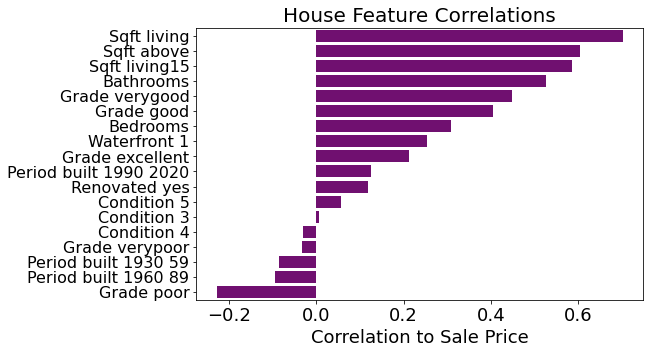

In [39]:
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x=datacorr.values, y=datacorr.index, orient='h', color='purple')
ylabels = [item.capitalize() for item in datacorr.index]
ylabels = [item.split('_') for item in ylabels]
ylabels = [' '.join(item) for item in ylabels]
ax.set_yticklabels(ylabels, size=16)
ax.tick_params(axis='x', which='major', labelsize=18)
ax.set_xlabel('Correlation to Sale Price', size=18)
ax.set_title('House Feature Correlations', size=20)
plt.savefig("Feature_correlations.png");

Based on the above *sqft_above*  and *sqft_living15* will be removed from the model because, although sqft_living occurs in 3/4 highly correlated pairs (indicated a Multicollinearity problem) sqft_living is also most highly correlated with price, so we will keep sqft_living and remove *sqft_above*  and *sqft_living15* to mitigate the Multicollinearity problem. 

We will also remove condition_3, because it is highly correlated with condition_4 and has very low correlation with price. 


In [40]:
df_dummies.drop(columns=['sqft_above','sqft_living15', 'condition_2', 'condition_3'], axis=1, inplace=True)

In [41]:
Features = df_dummies.drop(columns=['price'], axis=1)
Price = df_dummies['price']

##  Model 1

Model 1 changes:
* Removed condition_2 due to a high p-value 
* Removed sqft_above， sqft_living15， and  condition_3 to resolve multicolinearity issues. 

In [42]:
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'condition_4', 'condition_5',
       'grade_Excellent', 'grade_Good', 'grade_Poor', 'grade_VeryGood',
       'grade_VeryPoor', 'period_built_1930_59', 'period_built_1960_89',
       'period_built_1990_2020', 'renovated_Yes', 'waterfront_1']
outcome = 'price'


predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
first_model = ols(formula=formula, data=df_dummies).fit()
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     2656.
Date:                Sun, 23 Oct 2022   Prob (F-statistic):               0.00
Time:                        12:49:02   Log-Likelihood:            -2.9610e+05
No. Observations:               21597   AIC:                         5.922e+05
Df Residuals:                   21581   BIC:                         5.924e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               2.578e+05   7809.487     33.009      0.000    2.42e+05    2.73e+05
bedrooms               -3.447e+04   2068.466    -16.663      0.000   -3.85e+04   -3.04e+04
bathrooms               6.626e+04   3430.583     19.315      0.000    5.95e+04     7.3e+04
sqft_living              177.2820      3.222     55.018      0.000     170.966     183.598
condition_4             2.544e+04   3765.537      6.756      0.000    1.81e+04    3.28e+04
condition_5             6.328e+04   5953.732     10.629      0.000    5.16e+04     7.5e+04
grade_Excellent         2.134e+06   6.21e+04     34.354      0.000    2.01e+06    2.26e+06
grade_Good              2.085e+05   4988.646     41.785      0.000    1.99e+05    2.18e+05
grade_Poor             -1.016e+05   5470.902    -18.575      0.000   -1.12e+05   -9.09e+04
grade_VeryGood          6.413e+05   1.21e+04     52.820      0.000    6.18e+05    6.65e+05
grade_VeryPoor         -1.204e+05   4.14e+04     -2.910      0.004   -2.02e+05   -3.93e+04
period_built_1930_59   -8.527e+04   5318.520    -16.032      0.000   -9.57e+04   -7.48e+04
period_built_1960_89   -2.078e+05   5268.622    -39.448      0.000   -2.18e+05   -1.98e+05
period_built_1990_2020  -2.53e+05   6122.476    -41.327      0.000   -2.65e+05   -2.41e+05
renovated_Yes           5.814e+04   8546.663      6.802      0.000    4.14e+04    7.49e+04
waterfront_1            6.683e+05   1.72e+04     38.855      0.000    6.35e+05    7.02e+05
==============================================================================
Omnibus:                    11882.947   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           335880.002
Skew:                           2.107   Prob(JB):                         0.00
Kurtosis:                      21.855   Cond. No.                     9.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Train-Test

In [43]:
X = df_dummies.drop("price", axis=1)
y = df_dummies["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
LinearRegression()


LinearRegression()

In [44]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [45]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error: ', test_mse)

Train Mean Squared Error: 48395658296.99165
Test Mean Squared Error:  44552692469.69352


In [46]:
diff = ((train_mse-test_mse)/train_mse)
print(diff)

0.07940724359434984


The first model's  R-Squared is 0.65,  indicating our model accounts for 65% of the variance in house prices. Our R-sqauared declined slighty by 0.03, liekly due to us removing predictor variables.

The model did perform better in the Train-Test, with test's mean square error 6.9% lower than the training data. Indicating the model is still overfitting the data, but to a lesser degree. 

To check how our model can be further improved, we will check the distribution of the continuous variables to see if log transformation might be useful. 

In [47]:
# function to evaluate the models and their predicted sale prices vs. the actual sale prices
def evaluate(y_tr, y_te, y_tr_pr, y_te_pr, log=True):
    '''
    Evaluates the error between the model predictions and the real values for both
    training and test sets.
    
    Arguments:
    y_tr - array-like
        Actual values for output variable, for the training set
    y_tr_pr - array-like
        Predicted values for output variable, for the training set
    y_te - array-like
        Actual values for output variable, for the test set
    y_te_pr - array-like
        Predicted values for output variable, for the test set
    log=True
        If true, 
    Returns:
    R2 scores for Train and Test sets
    RMSE for Train and Test sets
    MAE for Train and Test sets
    '''
    if log == True:
        y_tr = np.exp(y_tr)
        y_te = np.exp(y_te)
        y_tr_pr = np.exp(y_tr_pr)
        y_te_pr = np.exp(y_te_pr)
        
    # residuals
    train_res = y_tr - y_tr_pr
    test_res = y_te - y_te_pr
    
    print(f'Train R2 score: {r2_score(y_tr, y_tr_pr)} ')
    print(f'Test R2 score: {r2_score(y_te, y_te_pr)} ')
    print('<><><><><>')
    print(f'Train RMSE: ${mean_squared_error(y_tr, y_tr_pr, squared=False):,.2f} ')
    print(f'Test RMSE: ${mean_squared_error(y_te, y_te_pr, squared=False):,.2f} ')
    print('<><><><><>')
    print(f'Train MAE: ${mean_absolute_error(y_tr, y_tr_pr):,.2f} ')
    print(f'Test MAE: ${mean_absolute_error(y_te, y_te_pr):,.2f} ')
    
    # scatter plot of residuals
    print("\nScatter of residuals:")
    plt.scatter(y_tr_pr, train_res, label='Train')
    plt.scatter(y_te_pr, test_res, label='Test')
    plt.axhline(y=0, color='purple', label='0')
    plt.xlabel("Predicted Price")
    plt.ylabel("Residual Price")
    plt.legend()
    plt.show()
    
    print("QQ Plot of residuals:")
    fig, ax = plt.subplots()
    sm.qqplot(train_res, ax=ax, marker='.', color='pink', label='Train', alpha=0.3, line='s')
    sm.qqplot(test_res, ax=ax,  marker='.', color='g', label='Test', alpha=0.3)
    plt.legend()

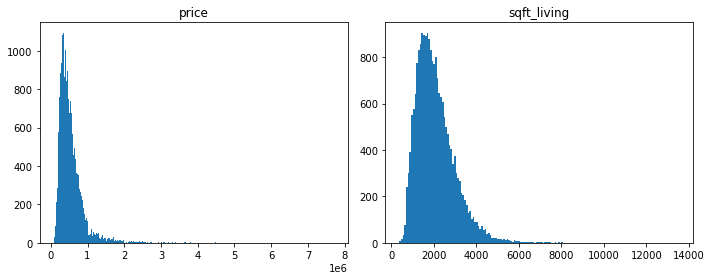

In [48]:
cat_data = df_dummies.loc[:, ((df_dummies.dtypes != 'object') &(df_dummies.nunique() > 15))]
fig, axes = plt.subplots(nrows=(cat_data.shape[1] // 2), ncols=2, figsize=(10,4))
categoricals = [column for column in cat_data.columns if column != 'bathrooms']

for col, ax in zip(categoricals, axes.flatten()):
    ax.hist(df_dummies[col].dropna(), bins='auto')
    ax.set_title(col)
    
fig.tight_layout()

Price and sqft_living both appear to be positively skewed, so we will check the distribution of the residuals. 

In [49]:
def model_diagnostic(model, x, x_name, y):
    residuals = model.resid
    
    f = plt.figure()
    f, axes = plt.subplots(nrows = 1, ncols = 3, sharex=False, sharey = False, figsize=(65,20), squeeze=False)
    
    f.text(s="Model Diagnostic Summary", x=.40, y=1.15, fontsize=65)
    f.text(s="r-Squared: {r}".format(r=round(model.rsquared, 2)), x=.40, y=1.05, fontsize=50)
    f.text(s="p-value: {p}".format(p= model.f_pvalue), x=.53, y=1.05, fontsize=50)
    
    f.text(s='Residuals Histogram', x=.45, y=.93, fontsize=55)
    
    sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, ax=axes[0][0])    
    plt.show;
    
    f.text(s='QQ Plot', x=.20, y=.93, fontsize=55,)
    
    axes[0][1].hist(residuals)
    plt.show;
    
    sns.residplot(x, y, ax=axes[0][2])
 
    f.text(s='Residuals vs {x}'.format(x=x_name), x=.73, y=.93, fontsize=55,)
    plt.tight_layout;
    plt.show;

### Checking Linear Regression Assumptions

<Figure size 432x288 with 0 Axes>

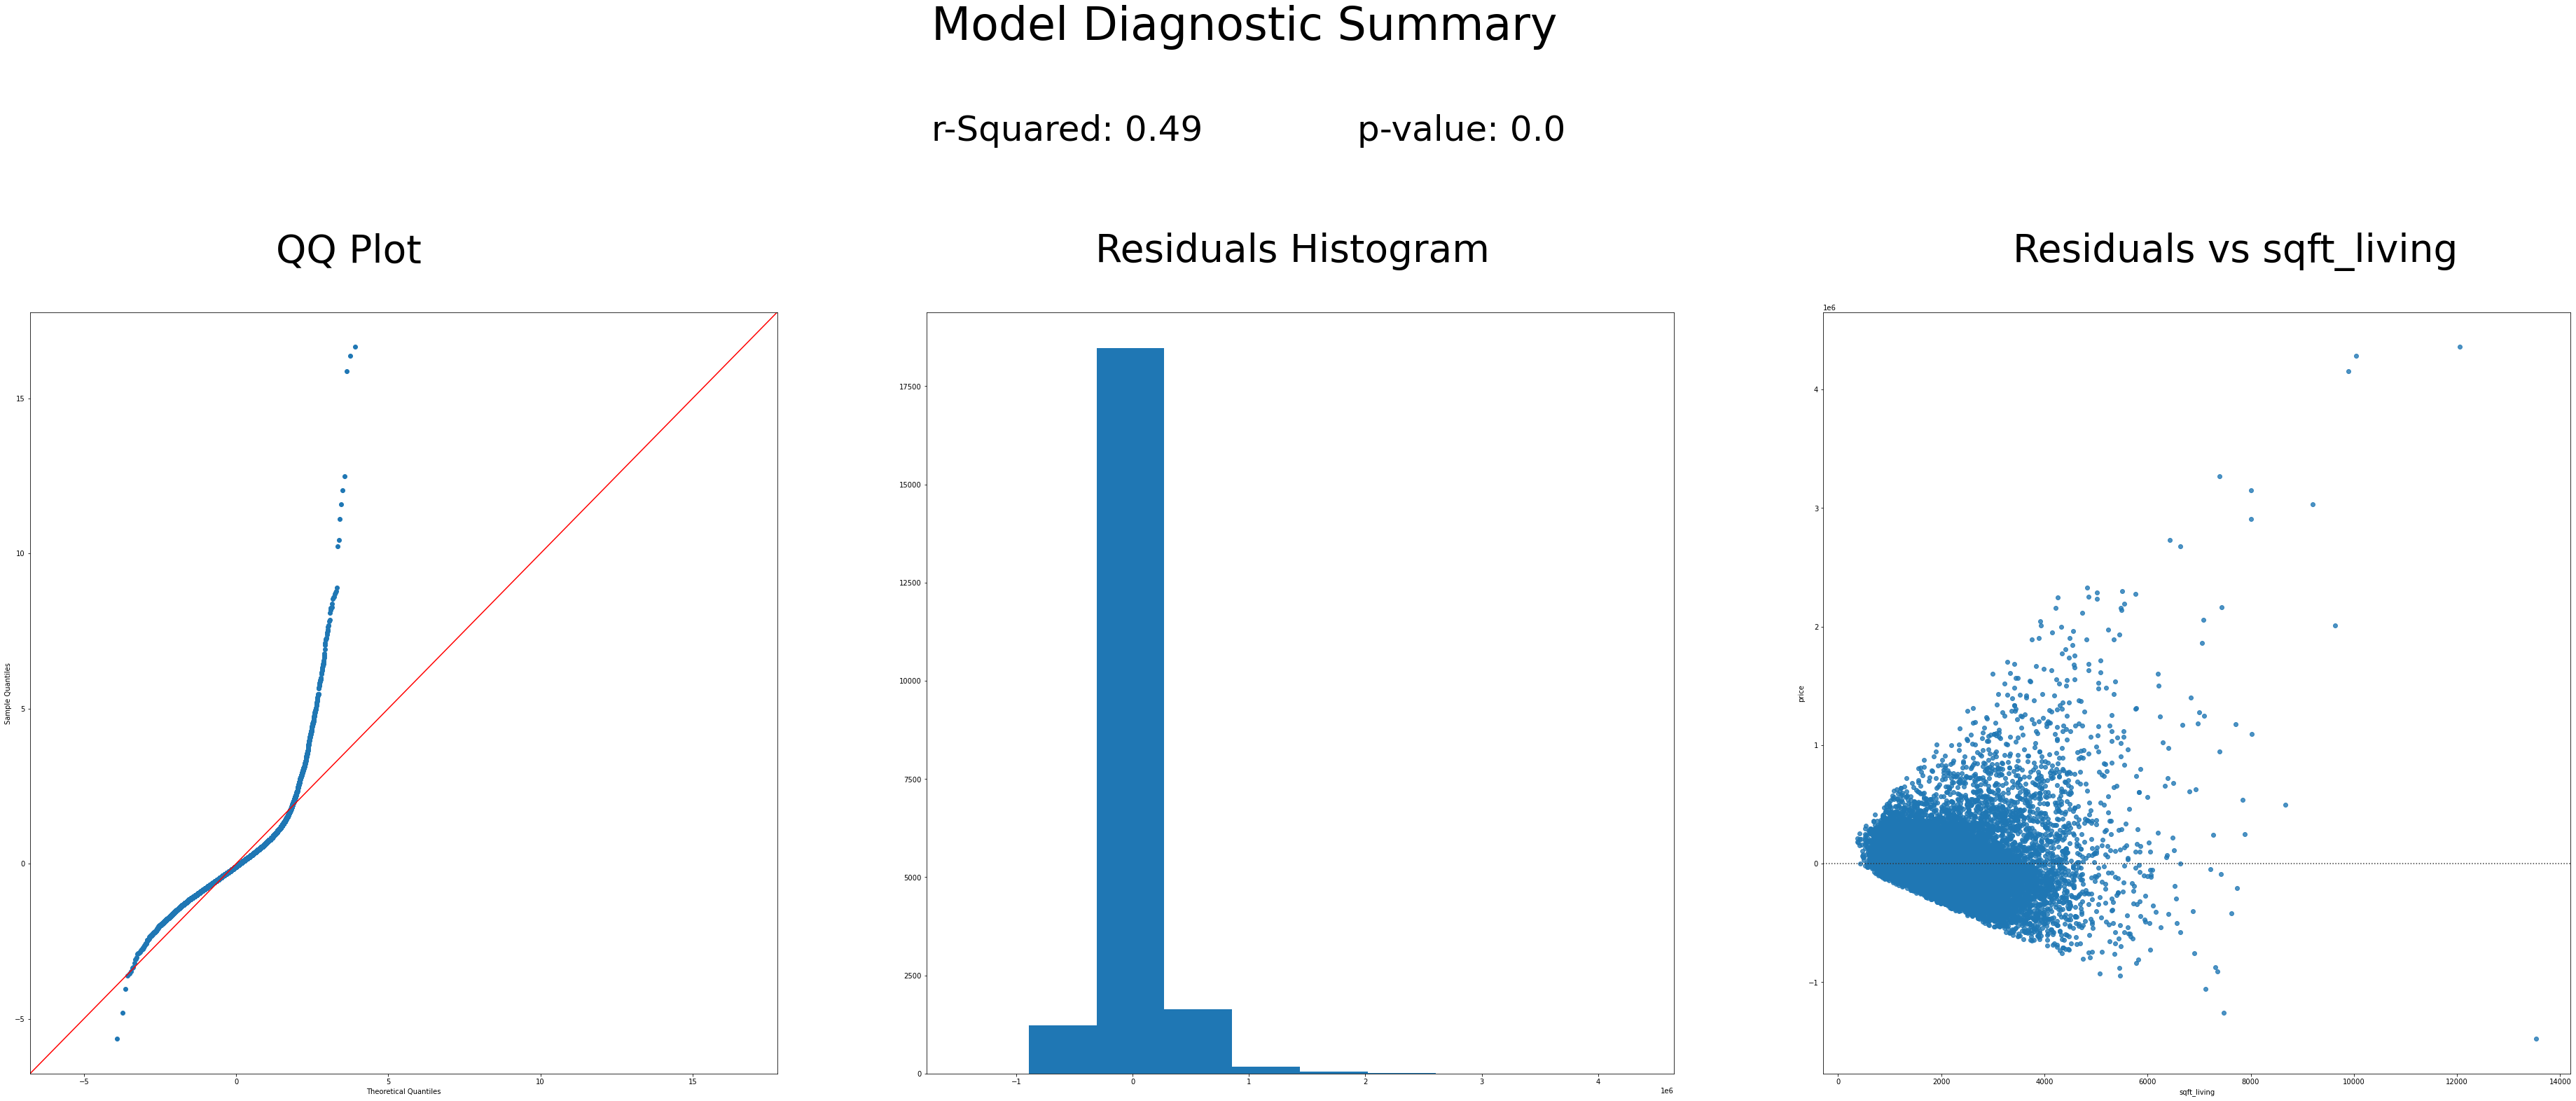

In [50]:
price = df['price']
f1= 'price~sqft_living'
sqft_living = df_dummies['sqft_living']
sqft_living_model = smf.ols(formula=f1,data=df_dummies).fit()
model_diagnostic(sqft_living_model, sqft_living, 'sqft_living', price)

The graphs above show that price, sqft_living, and **sqft_living15 's** residuals all violate 2 assumptions of linear regression: 

1. Homoscedasticity
2. Normality of residuals

We will perform a log transformation

In [51]:
df_dummies['log_price'] = np.log(df_dummies['price'])
df_dummies['log_sqft_living'] = np.log(df_dummies['sqft_living'])
#df_dummies['log_sqft_living15'] = np.log(df_dummies['sqft_living15'])

In [52]:
df_log = df_dummies.drop(columns=['price', 'sqft_living', ], axis=1)

<Figure size 432x288 with 0 Axes>

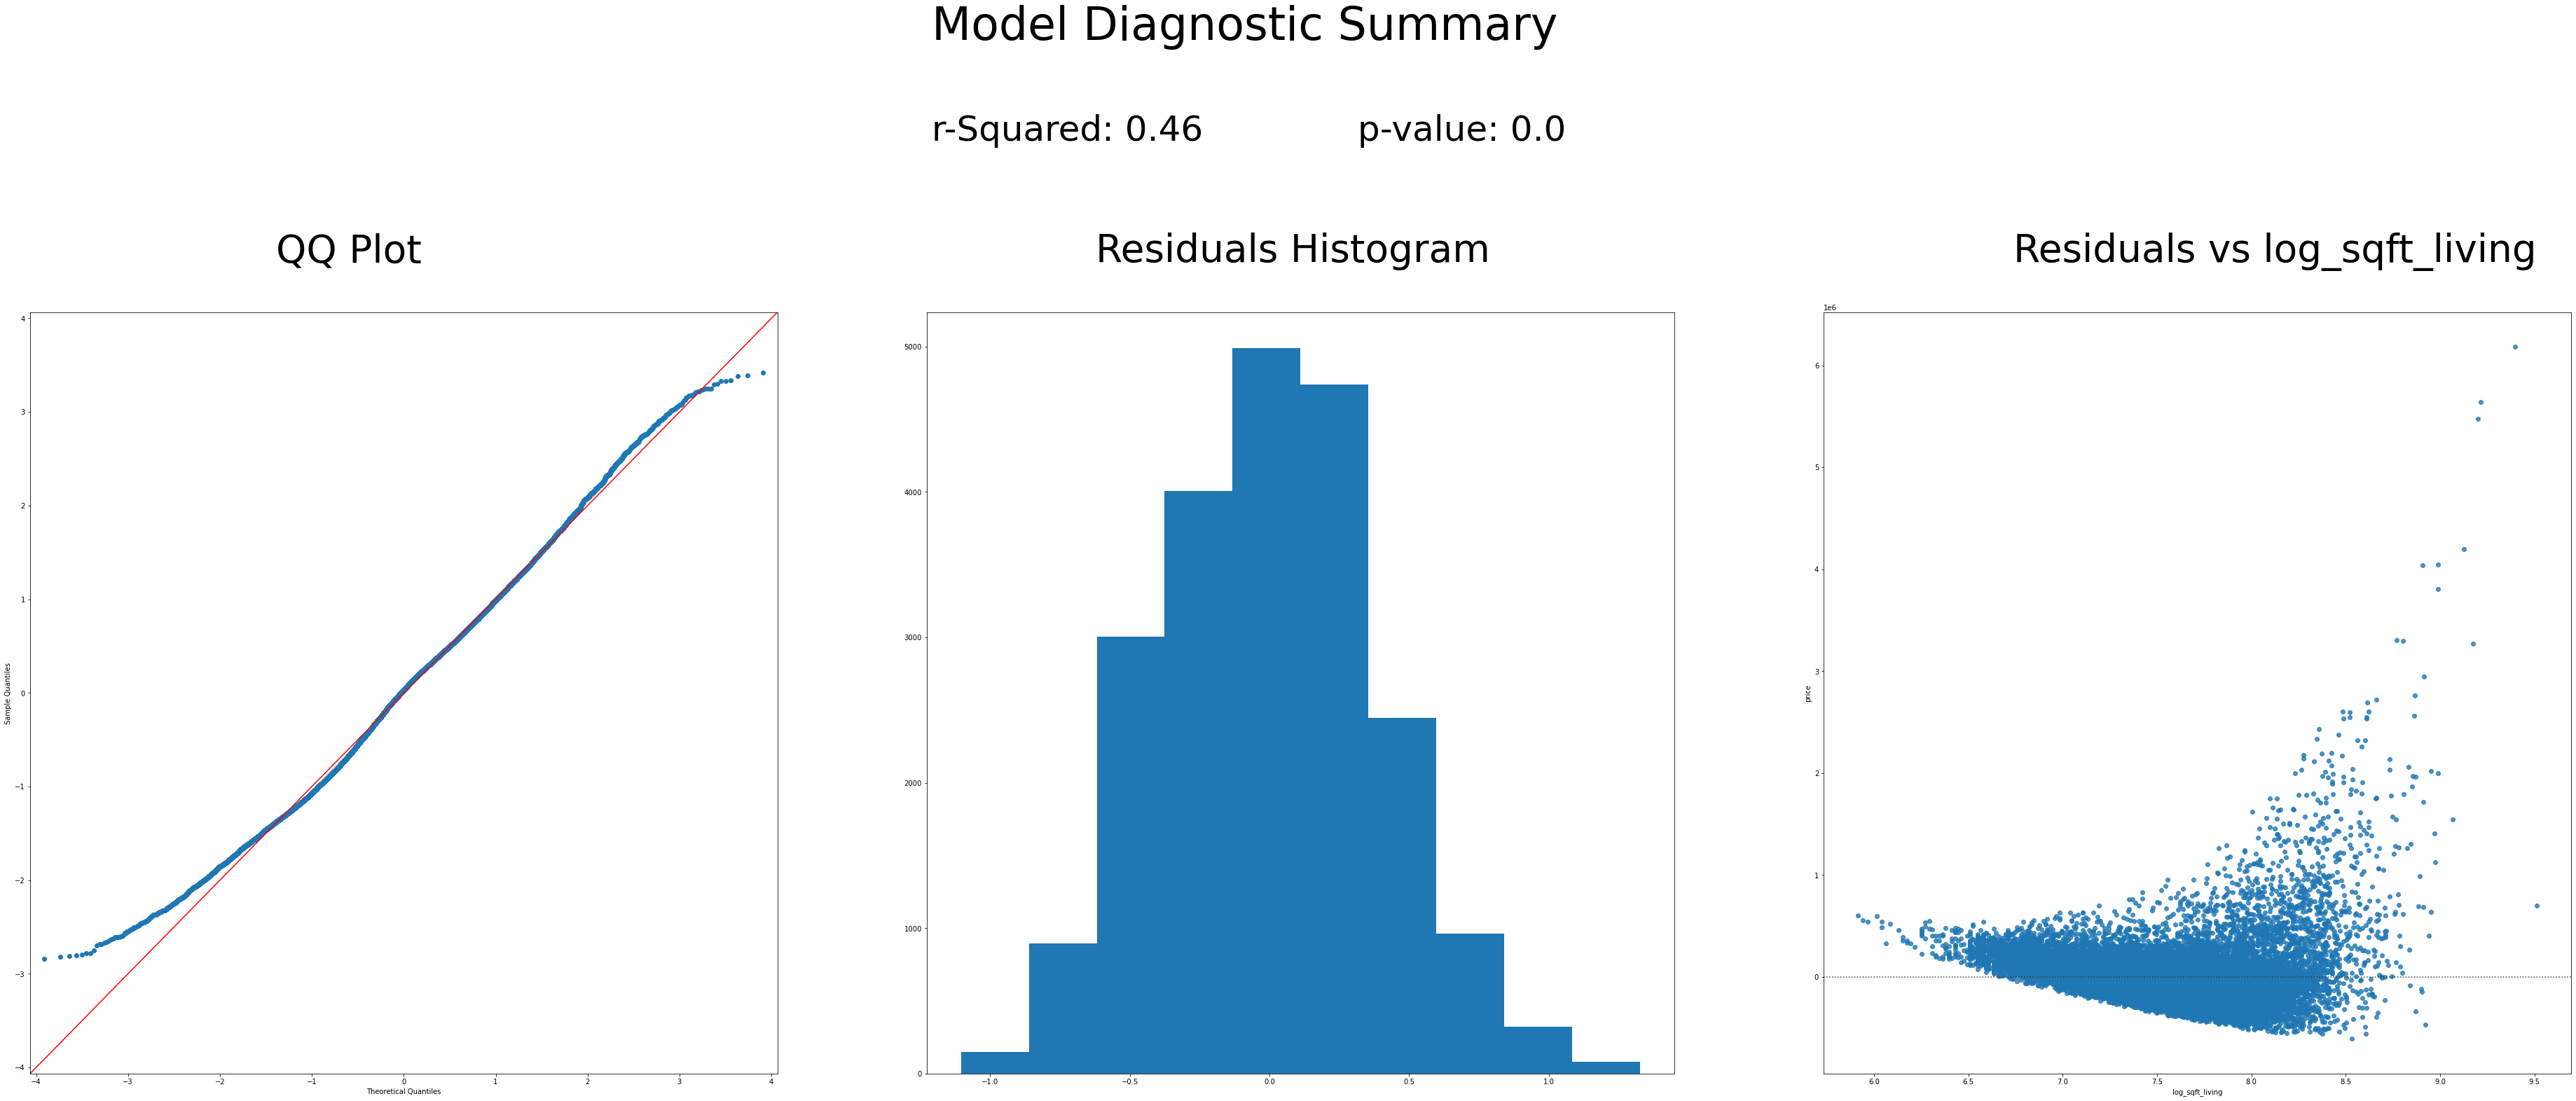

In [53]:
f = 'log_price~log_sqft_living'
sqft_living = df_log['log_sqft_living']
sqft_living_model = smf.ols(formula=f, data=df_log).fit()
model_diagnostic(sqft_living_model, sqft_living, 'log_sqft_living', price)

After logging the data, the residuals appear alot more normally distributed. The residuals are still violating the Homoscedasticity assumption, but to a lesser degree. 

After getting the log values of the positively skewed features, we can see they're now a lor more normally distributed. Let

datacorrp = df_log[['bedrooms', 'bathrooms', 'condition_4',
       'condition_5', 'grade_Excellent', 'grade_Good', 'grade_Poor',
       'grade_VeryGood', 'grade_VeryPoor', 'period_built_1930_59',
       'period_built_1960_89', 'period_built_1990_2020', 'renovated_Yes',
       'waterfront_1', 'log_price', 'log_sqft_living']]
datacorr = datacorrp.corr().sort_values('log_price',ascending=False)['log_price']
datacorr = datacorr.drop(index=['log_price'])


#### Min-Max Scaling 

Min-max scaling was performed due to variance in the feature value magnitudes.

In [54]:
for x in df_log.columns:
    if x == 'log_price':
        pass
    else:
        df_log[x] = (df_log[x] - df_log[x].min())/(df_log[x].max() - df_log[x].min())

<Figure size 432x288 with 0 Axes>

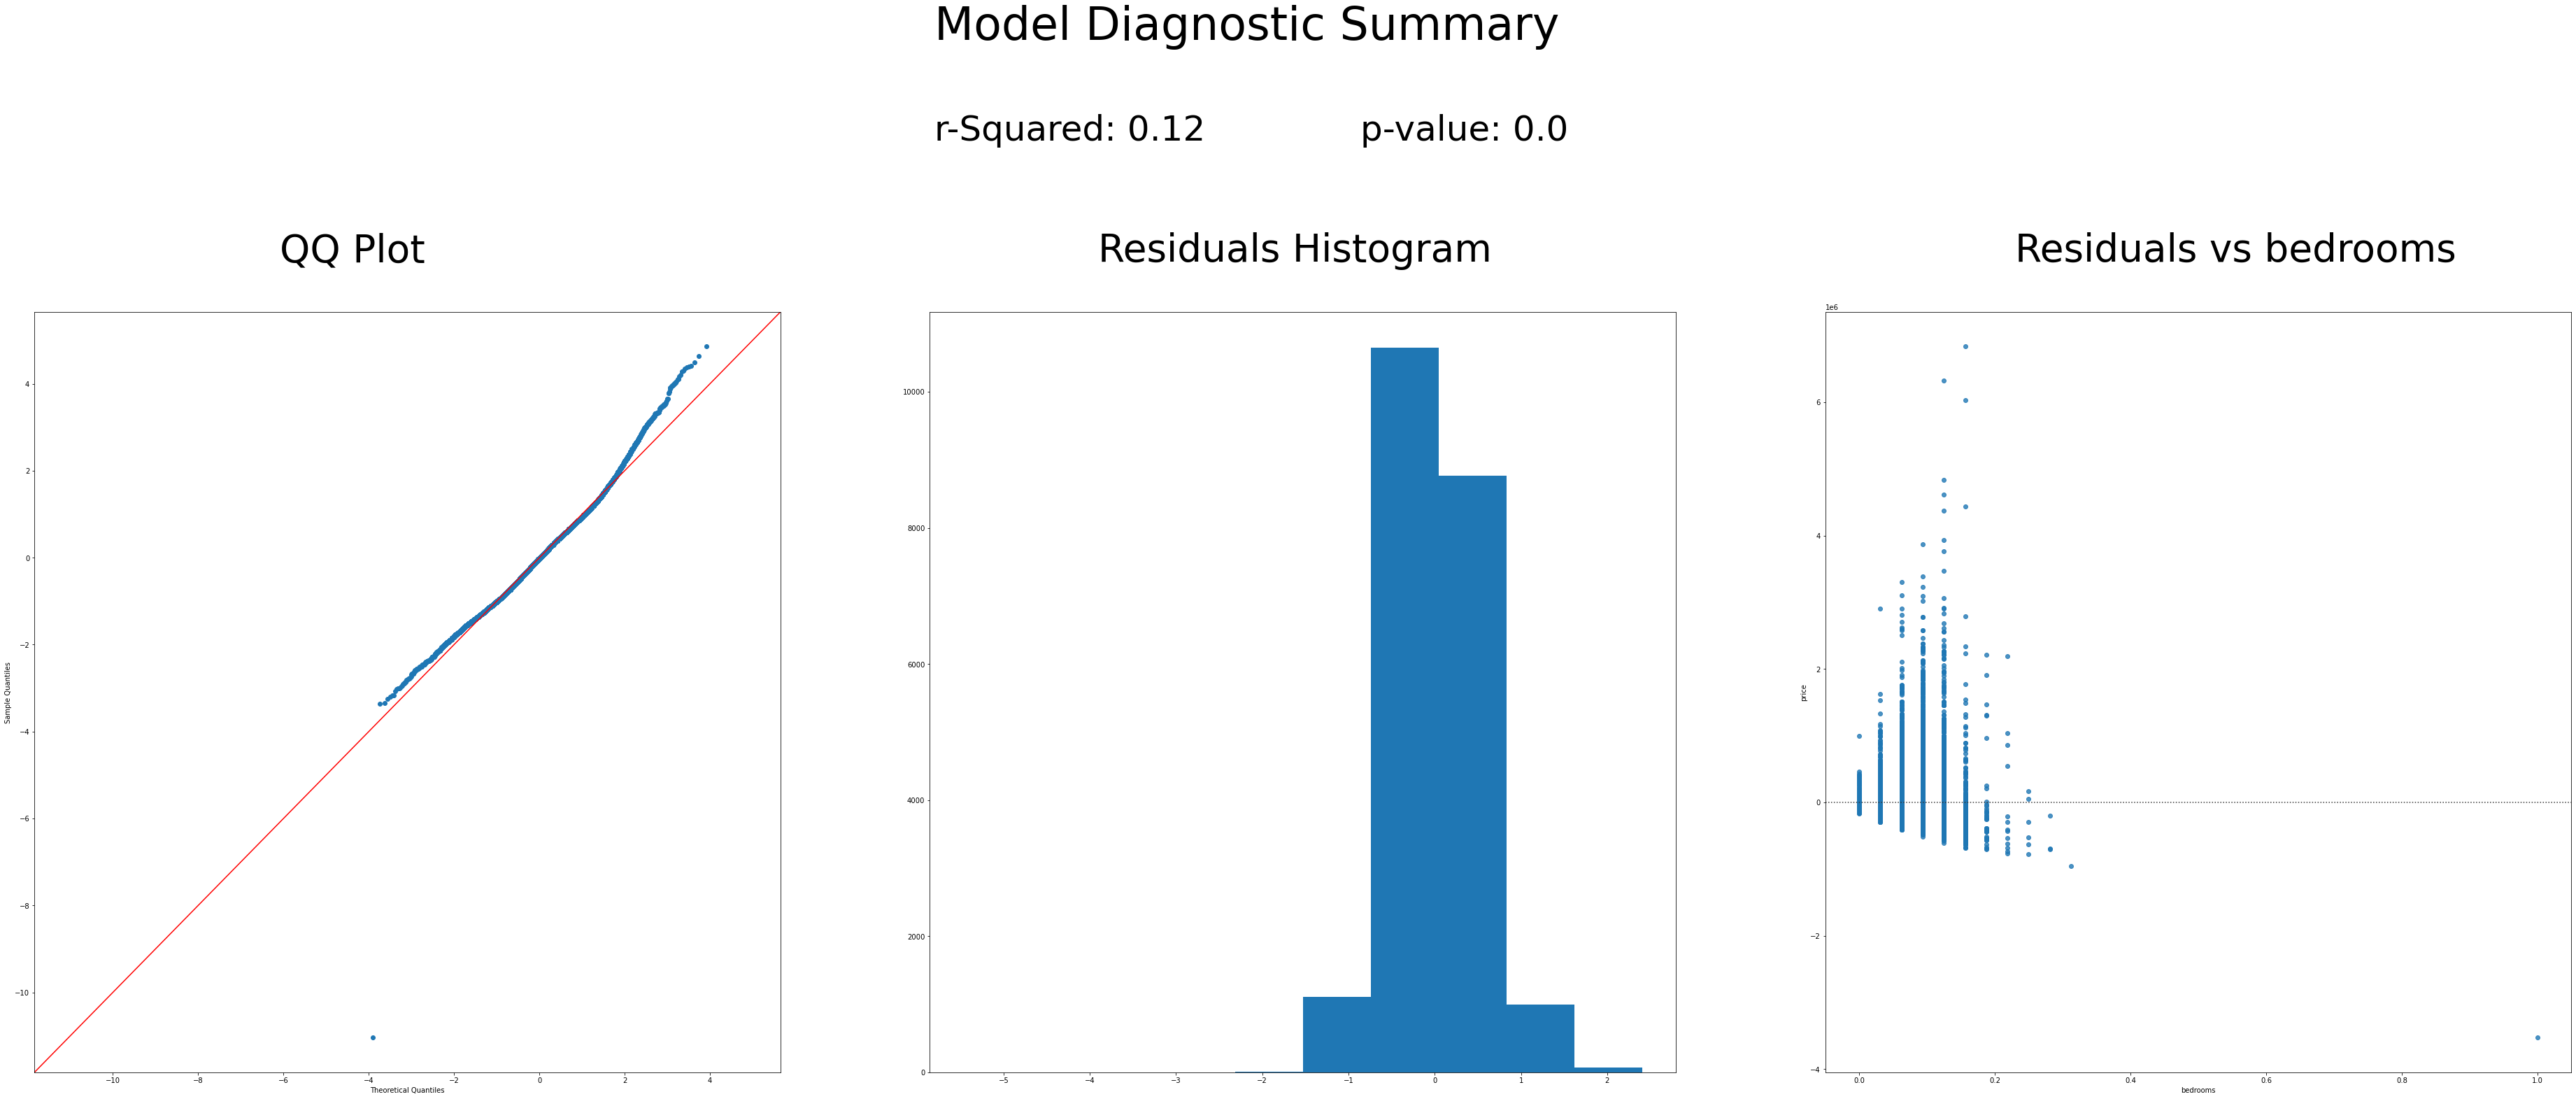

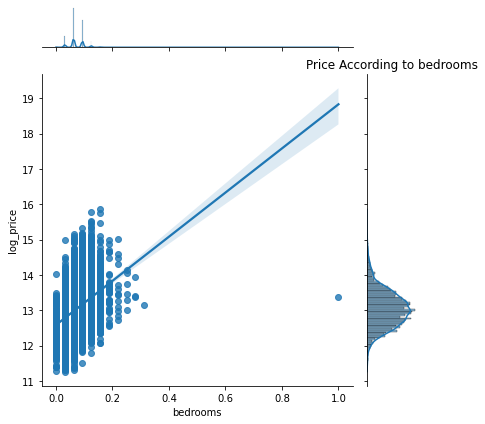

In [55]:
f = 'log_price~bedrooms'
bedrooms = df_log['bedrooms']
bedrooms_model = smf.ols(formula=f, data=df_log).fit()
model_diagnostic(bedrooms_model, bedrooms, 'bedrooms', price)

sns.jointplot('bedrooms','log_price', data=df_log, kind='reg')
plt.title("Price According to bedrooms")
plt.tight_layout()

Bedroom residuals are now reasonably (but not perfectly) normally distributed and there is a more linear relationship with price. However, bedrooms still claerly violates the homoscedasticity assumption, so it will be removed from the final model. 

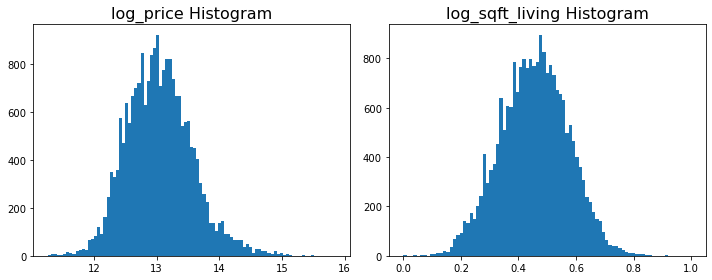

In [70]:
cat_data = df_log.loc[:, ((df_log.dtypes != 'object') &(df_log.nunique() > 15))]
fig, axes = plt.subplots(nrows=(cat_data.shape[1] // 2), ncols=2, figsize=(10,4))
categoricals = [column for column in cat_data.columns if column != 'bathrooms']

for col, ax in zip(categoricals, axes.flatten()):
    ax.hist(df_log[col].dropna(), bins='auto')
    ax.set_title(col + " Histogram", fontsize=16)
fig.tight_layout()

#### Linearity Check 

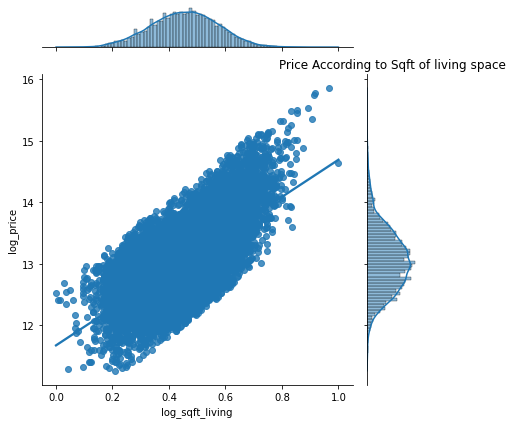

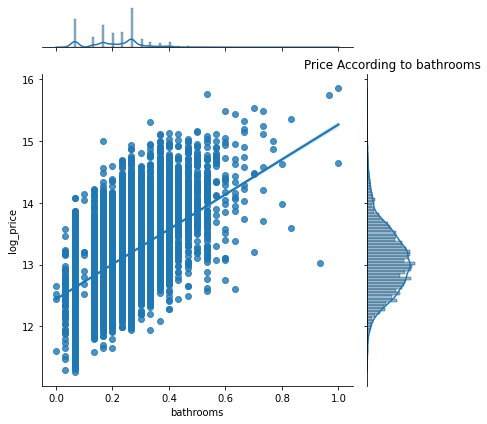

In [66]:
sns.jointplot('log_sqft_living','log_price', data=df_log, kind='reg')
plt.title("Price According to Sqft of living space")
plt.tight_layout()

sns.jointplot('bathrooms','log_price', data=df_log, kind='reg')
plt.title("Price According to bathrooms")
plt.tight_layout()


## Final Model 

Model 2 Changes 
* Log Tranformed Price, sqft_living, and sqft_living15
* Min-Max Scaling

In [58]:
outcome = 'log_price'
x_cols = [ 'bathrooms','condition_4', 'condition_5', 'grade_Excellent', 'grade_Good', 'grade_Poor',
       'grade_VeryGood', 'grade_VeryPoor', 'period_built_1930_59',
       'period_built_1960_89', 'period_built_1990_2020', 'renovated_Yes',
       'waterfront_1', 'log_sqft_living']

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
secondmodel = ols(formula=formula, data=df_log).fit()
secondmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     2393.
Date:                Sun, 23 Oct 2022   Prob (F-statistic):               0.00
Time:                        12:49:26   Log-Likelihood:                -6673.7
No. Observations:               21597   AIC:                         1.338e+04
Df Residuals:                   21582   BIC:                         1.350e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 12.3720      0.014    907.350      0.000      12.345      12.399
bathrooms                  0.7618      0.038     19.961      0.000       0.687       0.837
condition_4                0.0365      0.006      6.410      0.000       0.025       0.048
condition_5                0.0917      0.009     10.172      0.000       0.074       0.109
grade_Excellent            1.1518      0.092     12.473      0.000       0.971       1.333
grade_Good                 0.3877      0.007     53.761      0.000       0.374       0.402
grade_Poor                -0.2898      0.009    -34.029      0.000      -0.307      -0.273
grade_VeryGood             0.7291      0.017     43.344      0.000       0.696       0.762
grade_VeryPoor            -0.3795      0.063     -6.036      0.000      -0.503      -0.256
period_built_1930_59      -0.1866      0.008    -23.182      0.000      -0.202      -0.171
period_built_1960_89      -0.4037      0.008    -50.670      0.000      -0.419      -0.388
period_built_1990_2020    -0.4204      0.009    -45.624      0.000      -0.438      -0.402
renovated_Yes              0.0555      0.013      4.291      0.000       0.030       0.081
waterfront_1               0.5321      0.026     20.505      0.000       0.481       0.583
log_sqft_living            1.6445      0.034     48.909      0.000       1.579       1.710
==============================================================================
Omnibus:                        7.836   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.856
Skew:                          -0.040   Prob(JB):                       0.0197
Kurtosis:                       3.047   Cond. No.                         53.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

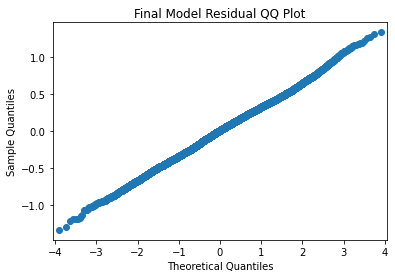

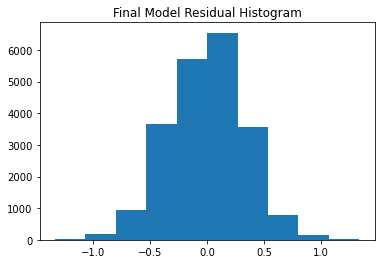

In [59]:
res = secondmodel.resid
fig = sm.qqplot(res)
plt.title("Final Model Residual QQ Plot")
plt.savefig('FinalModelResidualQQ.jpg')
plt.show()

fig = plt.hist(res)
plt.title("Final Model Residual Histogram")
plt.savefig('FinalModelResidualHistogram.png')
plt.show()

In [60]:
Features = df_dummies.drop(columns=['price'], axis=1)
Price = df_dummies['price']

By performing a log transformation, our R-sqaured value decreased slighty by 0.042. 

However, the both the Skew and Kurtosis values are now much more accetable. And we can see  model's residuals are now normally distributed. 

### Train-Test Model 2 

In [61]:
X1 = df_log.drop("log_price", axis=1)
y1 = df_log["log_price"]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, random_state=1)

linreg = LinearRegression()
linreg.fit(X_train1, y_train1)
LinearRegression()


LinearRegression()

In [62]:
y_hat_train1 = linreg.predict(X_train1)
y_hat_test1 = linreg.predict(X_test1)

In [63]:
train_mse1 = mean_squared_error(y_train1, y_hat_train1)
test_mse1 = mean_squared_error(y_test1, y_hat_test1)
print('Train Mean Squared Error:', train_mse1)
print('Test Mean Squared Error: ', test_mse1)

Train Mean Squared Error: 0.10707101986908524
Test Mean Squared Error:  0.10851530392597228


In [64]:
diff = ((train_mse1-test_mse1)/train_mse1)
print(diff)

-0.01348902867137115


In [65]:
train_target_mean1 = y_train1.mean()
M2_train_pred = [train_target_mean1] * len(y_train1)
M2_test_pred = [train_target_mean1] * len(y_test1)

Our second model has performed the best. Although the R-sqaured value reduced by 0.042, the model can still account for about 61% of variability in the sale price and it  performed far better when tested, with the test set Mean Squared Error only 1.2% larger than the training set. 